In [39]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import pydotplus
from IPython.display import Image
#mportamos las bibliotecas necesarias para el análisis de datos y la creación del modelo de árbol de decisión.


In [42]:
data = pd.read_csv("Cleaned-Data.csv") 
#Cargamos los datos desde un archivo CSV llamado "Cleaned-Data.csv" utilizando la biblioteca pandas.


In [43]:
data = pd.get_dummies(data, columns=["Country"], prefix="Country", drop_first=True)
#Realizamos una codificación one-hot para varias columnas categóricas, lo que significa que convertimos las categorías en variables binarias (0 o 1) para que el modelo pueda trabajar con ellas.

In [45]:
X = data.drop("Severity_Severe", axis=1)  # Excluyendo la columna "Severity_Severe" como etiqueta
y = data["Severity_Severe"]
#Separamos los datos en características (X) y etiquetas (y). Las características son los factores que se utilizarán para predecir la gravedad, y la etiqueta es la columna "Severity" que indica la gravedad de la enfermedad.

In [46]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Crear y entrenar un modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [48]:
# Crear una representación textual del árbol de decisión
tree_rules = tree.export_text(model, feature_names=list(X.columns))

In [49]:
# Generar el diagrama del árbol de decisión
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=X.columns,  
                                class_names=["Not Severe", "Severe"],  
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

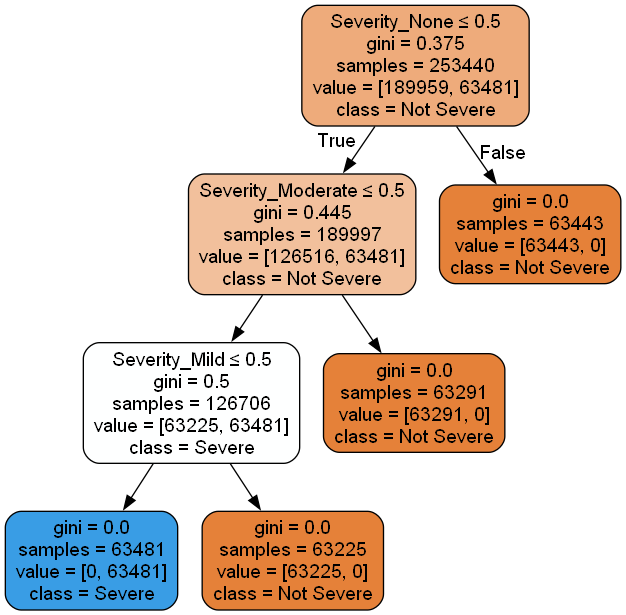

In [50]:
# Visualizar el árbol en Jupyter Notebook
Image(graph.pipe(format='png'))